In [10]:
%%file paraview_view.py
#### import the simple module from the paraview
from paraview.simple import *
#### disable automatic camera reset on 'Show'
paraview.simple._DisableFirstRenderCameraReset()

# create a new 'Legacy VTK Reader'
meshvtk = LegacyVTKReader(FileNames=['/home/bergmann/peterb/tech_topics/460_fem_pipe/fem-pipe/mesh.vtk'])

# get active view
renderView1 = GetActiveViewOrCreate('RenderView')
# uncomment following to set a specific view size
# renderView1.ViewSize = [660, 497]

# get color transfer function/color map for 'valuesC'
valuesCLUT = GetColorTransferFunction('valuesC')
valuesCLUT.RGBPoints = [-0.010476154753522706, 0.231373, 0.298039, 0.752941, 0.012684543124250004, 0.865003, 0.865003, 0.865003, 0.035845241002022715, 0.705882, 0.0156863, 0.14902]
valuesCLUT.ScalarRangeInitialized = 1.0

# show data in view
meshvtkDisplay = Show(meshvtk, renderView1)
# trace defaults for the display properties.
meshvtkDisplay.ColorArrayName = ['POINTS', 'valuesC']
meshvtkDisplay.LookupTable = valuesCLUT
meshvtkDisplay.GlyphType = 'Arrow'
meshvtkDisplay.ScalarOpacityUnitDistance = 36.430215288341394

# reset view to fit data
renderView1.ResetCamera()

# show color bar/color legend
meshvtkDisplay.SetScalarBarVisibility(renderView1, True)

# get opacity transfer function/opacity map for 'valuesC'
valuesCPWF = GetOpacityTransferFunction('valuesC')
valuesCPWF.Points = [-0.010476154753522706, 0.0, 0.5, 0.0, 0.035845241002022715, 1.0, 0.5, 0.0]
valuesCPWF.ScalarRangeInitialized = 1

# set scalar coloring
ColorBy(meshvtkDisplay, ('CELLS', '_Marker'))

# rescale color and/or opacity maps used to include current data range
meshvtkDisplay.RescaleTransferFunctionToDataRange(True)

# show color bar/color legend
meshvtkDisplay.SetScalarBarVisibility(renderView1, True)

# get color transfer function/color map for 'Marker'
markerLUT = GetColorTransferFunction('Marker')
markerLUT.RGBPoints = [0.0, 0.231373, 0.298039, 0.752941, 1.0, 0.865003, 0.865003, 0.865003, 2.0, 0.705882, 0.0156863, 0.14902]
markerLUT.ScalarRangeInitialized = 1.0

# get opacity transfer function/opacity map for 'Marker'
markerPWF = GetOpacityTransferFunction('Marker')
markerPWF.Points = [0.0, 0.0, 0.5, 0.0, 2.0, 1.0, 0.5, 0.0]
markerPWF.ScalarRangeInitialized = 1

# change representation type
meshvtkDisplay.SetRepresentationType('Surface With Edges')

# create a new 'Threshold'
threshold1 = Threshold(Input=meshvtk)
threshold1.Scalars = ['POINTS', 'valuesC']
threshold1.ThresholdRange = [-0.010476154753522706, 0.035845241002022715]

# set active source
SetActiveSource(meshvtk)

# set active source
SetActiveSource(threshold1)

# Properties modified on threshold1
threshold1.Scalars = ['CELLS', '_Marker']
threshold1.ThresholdRange = [1.1, 1.1]

# show data in view
threshold1Display = Show(threshold1, renderView1)
# trace defaults for the display properties.
threshold1Display.ColorArrayName = [None, '']
threshold1Display.GlyphType = 'Arrow'

# hide data in view
Hide(meshvtk, renderView1)

# Properties modified on threshold1
threshold1.ThresholdRange = [0.0, 1.36]

# set active source
SetActiveSource(meshvtk)

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(None)

# set active source
SetActiveSource(meshvtk)

# set active source
SetActiveSource(None)

# create a new 'Legacy VTK Reader'
meshvtk_1 = LegacyVTKReader(FileNames=['/home/bergmann/peterb/tech_topics/460_fem_pipe/fem-pipe/mesh.vtk'])

# show data in view
meshvtk_1Display = Show(meshvtk_1, renderView1)
# trace defaults for the display properties.
meshvtk_1Display.ColorArrayName = ['POINTS', 'valuesC']
meshvtk_1Display.LookupTable = valuesCLUT
meshvtk_1Display.GlyphType = 'Arrow'
meshvtk_1Display.ScalarOpacityUnitDistance = 36.430215288341394

# show color bar/color legend
meshvtk_1Display.SetScalarBarVisibility(renderView1, True)

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(meshvtk_1)

# create a new 'Threshold'
threshold2 = Threshold(Input=meshvtk_1)
threshold2.Scalars = ['POINTS', 'valuesC']
threshold2.ThresholdRange = [-0.010476154753522706, 0.035845241002022715]

# Properties modified on threshold2
threshold2.Scalars = ['CELLS', '_Marker']

# show data in view
threshold2Display = Show(threshold2, renderView1)
# trace defaults for the display properties.
threshold2Display.ColorArrayName = ['POINTS', 'valuesC']
threshold2Display.LookupTable = valuesCLUT
threshold2Display.GlyphType = 'Arrow'
threshold2Display.ScalarOpacityUnitDistance = 23.28464850717793

# hide data in view
Hide(meshvtk_1, renderView1)

# show color bar/color legend
threshold2Display.SetScalarBarVisibility(renderView1, True)

# Properties modified on threshold2
threshold2.ThresholdRange = [0.9, 2.0]

# hide data in view
Hide(threshold1, renderView1)

# set active source
SetActiveSource(threshold1)

# show data in view
threshold1Display = Show(threshold1, renderView1)

# set active source
SetActiveSource(meshvtk_1)

# set scalar coloring
ColorBy(meshvtk_1Display, ('CELLS', '_Marker'))

# rescale color and/or opacity maps used to include current data range
meshvtk_1Display.RescaleTransferFunctionToDataRange(True)

# set active source
SetActiveSource(threshold2)

# set scalar coloring
ColorBy(threshold2Display, ('CELLS', '_Marker'))

# rescale color and/or opacity maps used to include current data range
threshold2Display.RescaleTransferFunctionToDataRange(True)

# show color bar/color legend
threshold2Display.SetScalarBarVisibility(renderView1, True)

# set active source
SetActiveSource(threshold1)

# change representation type
threshold1Display.SetRepresentationType('Surface With Edges')

# create a new 'Clip'
clip1 = Clip(Input=threshold1)
clip1.ClipType = 'Plane'
clip1.Scalars = ['POINTS', 'valuesC']
clip1.Value = 0.012684543124250006

# init the 'Plane' selected for 'ClipType'
clip1.ClipType.Origin = [0.0, 0.0, 150.0]

# set active source
SetActiveSource(threshold1)

# destroy clip1
Delete(clip1)
del clip1

# set active source
SetActiveSource(threshold2)

# create a new 'Clip'
clip1 = Clip(Input=threshold2)
clip1.ClipType = 'Plane'
clip1.Scalars = ['POINTS', 'valuesC']
clip1.Value = 0.012684543124250006

# init the 'Plane' selected for 'ClipType'
clip1.ClipType.Origin = [0.0, 0.0, 150.0]

# show data in view
clip1Display = Show(clip1, renderView1)
# trace defaults for the display properties.
clip1Display.ColorArrayName = ['POINTS', 'valuesC']
clip1Display.LookupTable = valuesCLUT
clip1Display.GlyphType = 'Arrow'
clip1Display.ScalarOpacityUnitDistance = 54.86139176364374

# hide data in view
Hide(threshold2, renderView1)

# show color bar/color legend
clip1Display.SetScalarBarVisibility(renderView1, True)

# Properties modified on clip1
clip1.InsideOut = 1

# reset view to fit data
renderView1.ResetCamera()

# reset view to fit data
renderView1.ResetCamera()

# reset view to fit data
renderView1.ResetCamera()

# reset view to fit data
renderView1.ResetCamera()

# reset view to fit data
renderView1.ResetCamera()

# set active source
SetActiveSource(None)

# Properties modified on renderView1
renderView1.Background = [1.0, 1.0, 1.0]

# set active source
SetActiveSource(clip1)

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(meshvtk)

# Properties modified on meshvtkDisplay
meshvtkDisplay.Opacity = 0.97

# Properties modified on meshvtkDisplay
meshvtkDisplay.Opacity = 0.88

# Properties modified on meshvtkDisplay
meshvtkDisplay.Opacity = 0.85

# Properties modified on meshvtkDisplay
meshvtkDisplay.EdgeColor = [0.5019607843137255, 0.5019607843137255, 0.5019607843137255]

# Properties modified on meshvtkDisplay
meshvtkDisplay.EdgeColor = [0.3333333333333333, 0.6666666666666666, 1.0]

# set active source
SetActiveSource(threshold1)

# Properties modified on threshold1Display
threshold1Display.EdgeColor = [0.5019607843137255, 0.5019607843137255, 0.5019607843137255]

# Properties modified on threshold1Display
threshold1Display.EdgeColor = [0.13725490196078433, 0.13725490196078433, 0.13725490196078433]

# set active source
SetActiveSource(meshvtk)

# create a new 'Outline'
outline1 = Outline()

# show data in view
outline1Display = Show(outline1, renderView1)
# trace defaults for the display properties.
outline1Display.ColorArrayName = [None, '']
outline1Display.GlyphType = 'Arrow'

# Properties modified on outline1Display
outline1Display.SpecularColor = [0.0, 0.0, 0.0]

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(clip1)

# change representation type
clip1Display.SetRepresentationType('Surface With Edges')

# turn off scalar coloring
ColorBy(clip1Display, None)

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipRadius = 0.0

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.38

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.41

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.51

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.6

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.5

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.4

# Properties modified on renderView1
renderView1.UseGradientBackground = 1

# Properties modified on renderView1
renderView1.UseGradientBackground = 0

# Properties modified on renderView1
renderView1.LightSwitch = 1

# Properties modified on renderView1
renderView1.LightSwitch = 0

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.43

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.49

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.52

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.62

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.65

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.61

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.18

# Properties modified on clip1Display.GlyphType
clip1Display.GlyphType.TipLength = 0.17

# Properties modified on renderView1
renderView1.UseGradientBackground = 1

# Properties modified on renderView1
renderView1.UseGradientBackground = 0
renderView1.UseTexturedBackground = 1

# Properties modified on renderView1
renderView1.UseTexturedBackground = 0

# Properties modified on renderView1
renderView1.CameraParallelProjection = 1

# Properties modified on renderView1
renderView1.CameraParallelProjection = 0

# Properties modified on clip1Display
clip1Display.EdgeColor = [0.21568627450980393, 0.21568627450980393, 0.21568627450980393]

# Properties modified on clip1Display
clip1Display.EdgeColor = [0.1568627450980392, 0.1568627450980392, 0.1568627450980392]

# Properties modified on clip1Display
clip1Display.SpecularColor = [1.0, 0.3333333333333333, 1.0]

# set active source
SetActiveSource(threshold2)

# set active source
SetActiveSource(clip1)

# change solid color
clip1Display.DiffuseColor = [0.8274509803921568, 0.8274509803921568, 0.8274509803921568]

# change solid color
clip1Display.DiffuseColor = [0.796078431372549, 0.796078431372549, 0.596078431372549]

# change solid color
clip1Display.DiffuseColor = [0.6666666666666666, 0.3333333333333333, 0.0]

# change solid color
clip1Display.DiffuseColor = [1.0, 0.6666666666666666, 0.0]

# change solid color
clip1Display.DiffuseColor = [0.7686274509803922, 0.7686274509803922, 0.7686274509803922]

# change solid color
clip1Display.DiffuseColor = [0.8431372549019608, 0.8431372549019608, 0.8431372549019608]

# change solid color
clip1Display.DiffuseColor = [0.9568627450980393, 0.9568627450980393, 0.9568627450980393]

# set active source
SetActiveSource(threshold1)

# Properties modified on threshold1Display
threshold1Display.Interpolation = 'Flat'

# change solid color
threshold1Display.DiffuseColor = [0.7843137254901961, 0.7843137254901961, 0.7843137254901961]

# set active source
SetActiveSource(clip1)

# change solid color
clip1Display.DiffuseColor = [1.0, 1.0, 1.0]

# set active source
SetActiveSource(outline1)

# Properties modified on outline1Display
outline1Display.CubeAxesVisibility = 1

# Properties modified on outline1Display
outline1Display.CubeAxesVisibility = 0

# change solid color
outline1Display.DiffuseColor = [0.0, 0.0, 0.0]

# Properties modified on outline1Display
outline1Display.BackfaceAmbientColor = [0.0, 0.0, 0.0]

# Properties modified on outline1Display
outline1Display.BackfaceDiffuseColor = [0.0, 0.0, 0.0]

# Properties modified on outline1Display
outline1Display.BackfaceOpacity = 0.95

# Properties modified on outline1Display
outline1Display.BackfaceOpacity = 0.35

# Properties modified on outline1Display
outline1Display.BackfaceOpacity = 0.27

# Properties modified on outline1Display
outline1Display.BackfaceOpacity = 0.24

# Properties modified on outline1Display
outline1Display.BackfaceOpacity = 0.34

# Properties modified on outline1Display
outline1Display.BackfaceOpacity = 0.36

# Properties modified on outline1Display
outline1Display.BackfaceOpacity = 1.0

# Properties modified on outline1Display
outline1Display.BackfaceRepresentation = 'Points'

# Properties modified on outline1Display
outline1Display.CubeAxesVisibility = 1

# Properties modified on outline1Display
outline1Display.CubeAxesVisibility = 0

# Properties modified on renderView1
renderView1.Background = [0.0, 0.0, 0.0]

# Properties modified on renderView1
renderView1.Background = [1.0, 1.0, 1.0]

# set active source
SetActiveSource(threshold1)

# change solid color
threshold1Display.DiffuseColor = [1.0, 1.0, 0.0]

# change solid color
threshold1Display.DiffuseColor = [1.0, 1.0, 0.4980392156862745]

# change solid color
threshold1Display.DiffuseColor = [1.0, 1.0, 0.0]

# hide data in view
Hide(clip1, renderView1)

# set active source
SetActiveSource(clip1)

# show data in view
clip1Display = Show(clip1, renderView1)

# hide data in view
Hide(outline1, renderView1)

# set active source
SetActiveSource(outline1)

# show data in view
outline1Display = Show(outline1, renderView1)

# hide data in view
Hide(outline1, renderView1)

# show data in view
outline1Display = Show(outline1, renderView1)

# Properties modified on renderView1
renderView1.Background = [0.3333333333333333, 0.6666666666666666, 0.0]

# set active source
SetActiveSource(threshold1)

# change solid color
threshold1Display.DiffuseColor = [0.0, 1.0, 0.0]

# Properties modified on renderView1
renderView1.Background = [1.0, 1.0, 1.0]

# change solid color
threshold1Display.DiffuseColor = [1.0, 1.0, 0.0]

# set active source
SetActiveSource(clip1)

# Properties modified on clip1.ClipType
clip1.ClipType.Origin = [239.9999998807907, 0.0, 150.0]

# set active source
SetActiveSource(outline1)

# Properties modified on outline1Display
outline1Display.CubeAxesVisibility = 1

# Properties modified on outline1Display
outline1Display.Opacity = 0.9

# Properties modified on outline1Display
outline1Display.Opacity = 0.8
# save screenshot
SaveScreenshot('/home/bergmann/peterb/tech_topics/460_fem_pipe/fem-pipe/mayavi/out.png', magnification=1, quality=100, view=renderView1)

Overwriting paraview_view.py


In [11]:
!paraview --script=paraview_view.py

paraview version 5.0.1


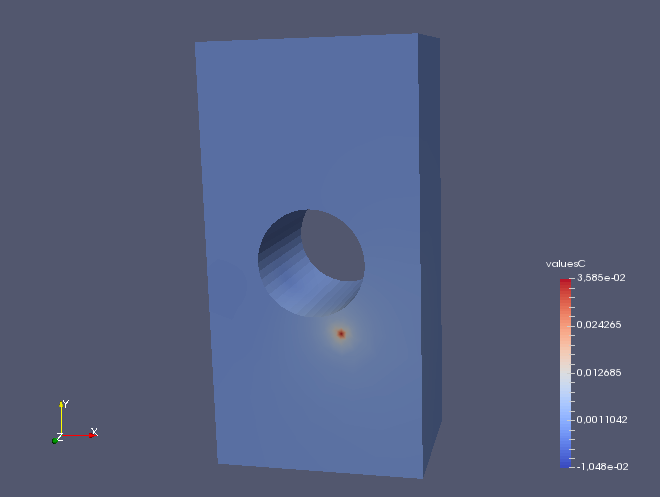

In [3]:
from IPython.display import Image
Image(filename='out.png') 